# Báo cáo Project
Lớp TTNT-156272156272, Nhóm G10

## 1. Thông tin chung

### Thành viên
- Trần Quang Huy 20226109
- Nguyễn Lương Hoàng Tùng 20226129
- Ngô Mạnh Hùng 20226083
- Ôn Quang Tùng 20226096

### Lịch thực hiện
- W25: Đăng ký nhóm 
- W26: Đề xuất project (1/3)
- W31: Báo cáo tiến độ giữa kỳ (5/4)
- W37: Hoàn thành và gửi báo cáo project (17/5)
- W38-40: Trình bày project, Q&A

## 2. Đề xuất project (W26)

### Bài toán: Phân loại chủ đề văn bản từ nội dung đầu vào

Bài toán dựa vào các mô hình học máy để đưa vào 1 văn bản tiếng Việt và đầu ra là một thể loại văn bản cụ thể ((ví dụ: Thể thao, Giải trí, Kinh tế, Chính trị, Khoa học, Công nghệ, v.v.).)

Để giải quyết bài toán này, chúng em sử dụng Ensemble Learning, một phương pháp kết hợp nhiều mô hình học máy nhằm nâng cao hiệu suất phân loại.

### Phương pháp
#### Tiển xử lí dữ liệu
- Nguồn dữ liệu được lấy từ kaggle.com
- Phân chia tập dữ liệu (train/test/validation).
- Sử dụng các phương pháp tiền xử lí văn bản: BoW, TF-IDF, Word2Vec, Tokenizer,... 
#### Thiết kế mô hình học máy
- Linear Regression
- Support Vector Machine (SVM)
- Decision Tree (DT), Random Forest (RF)
- K-Nearest Neighbors (KNN)
- Naïve Bayes (NB)
#### Kết hợp mô hình bằng Ensemble Learning
Để tối ưu hóa hiệu suất phân loại, chúng em dự định áp dụng một số kỹ thuật Ensemble Learning sau:
- Stacking: Kết hợp nhiều mô hình học máy (NB, SVM, RF, DT, KNN) và sử dụng một mô hình meta-classifier (chẳng hạn Logistic Regression) để tổng hợp kết quả dự đoán.
- Voting Classifier: Áp dụng Hard Voting hoặc Soft Voting để chọn mô hình có hiệu suất tốt nhất.
#### Đánh giá và lựa chọn mô hình tối ưu
Các mô hình được đánh giá dựa trên các độ đo hiệu suất phổ biến:
- Accurancy
- F1-score
- AUC/ROC

### Phân công
#### 1. Trần Quang Huy
- Code lại các thuật toán của từng model để sử dụng
- Thiết kế model Emsemble Learning
- Lựa chọn mô hình tối ưu
#### 2. Nguyễn Lương Hoàng Tùng
- Code lại các thuật toán của từng model để sử dụng
- Đánh giá hiệu suất mô hình
- Tối ưu mô hình để tìm tham số tốt nhất
#### 3. Ngô Mạnh Hùng
- Tiền xử lí dữ liệu
- Viết báo cáo dự án
- Kiểm tra và đánh giá chất lượng dữ liệu.
#### 4. Ôn Quang Tùng
- Tìm bộ dữ liệu data training/test trên các website
- Thiết kế giao diện đơn giản

## 3. Tiến độ giữa kỳ (W31)

### Bước 1: Chuẩn bị và tiền xử lí dữ liệu

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_files


from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
print("Hello")

Hello


In [2]:
import pandas as pd

file_path = "/kaggle/input/news-data/final_data.csv" # Check data types and missing values
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191731 entries, 0 to 191730
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           191731 non-null  object
 1   short_description  191731 non-null  object
 2   category           191731 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [3]:
# Check data types and missing values
df.info()# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Show columns with missing values
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191731 entries, 0 to 191730
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           191731 non-null  object
 1   short_description  191731 non-null  object
 2   category           191731 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


,Missing Values,Percentage


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Show columns with missing values
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

,Missing Values,Percentage


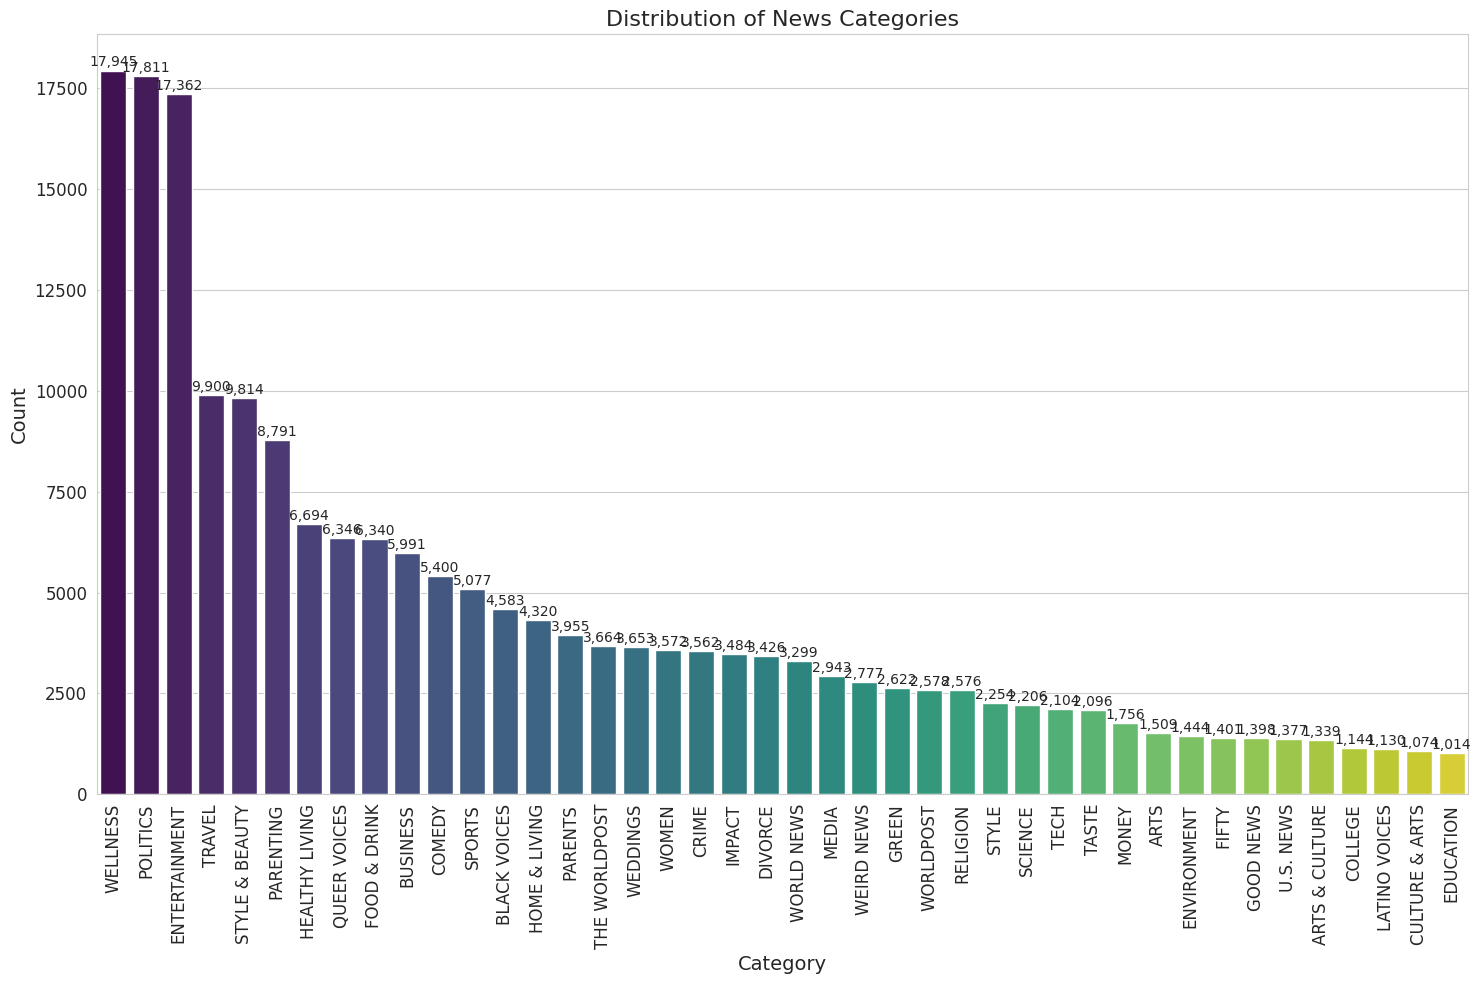

,Category,Percentage
0,WELLNESS,9.359467
1,POLITICS,9.289578
2,ENTERTAINMENT,9.055395
3,TRAVEL,5.163484
4,STYLE & BEAUTY,5.118630
5,PARENTING,4.585070
6,HEALTHY LIVING,3.491350
7,QUEER VOICES,3.309846
8,FOOD & DRINK,3.306716
9,BUSINESS,3.124690


In [5]:
# Category distribution
category_counts = df['category'].value_counts()

# Plot category distribution
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of News Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Add count labels on top of each bar
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 100, f"{count:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate category percentages
category_percentages = (category_counts / len(df) * 100).reset_index()
category_percentages.columns = ['Category', 'Percentage']
category_percentages.sort_values('Percentage', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


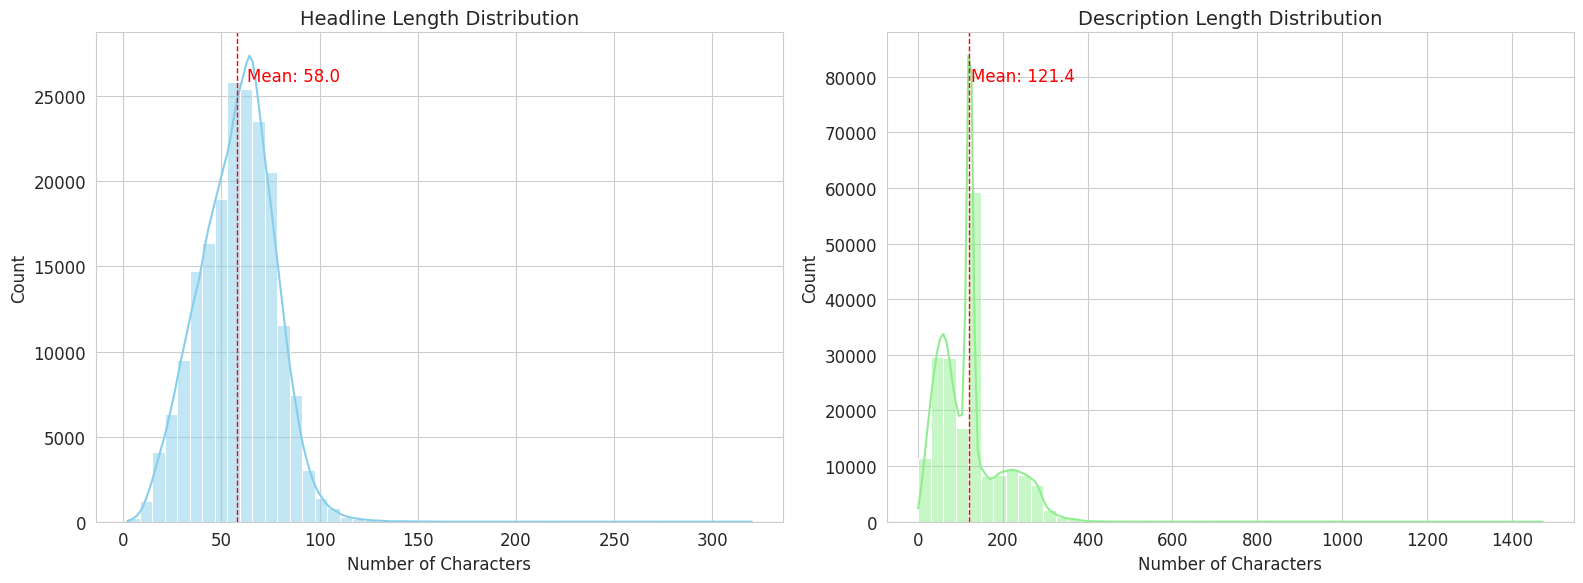

,Headline Length,Description Length
count,191731.000000,191731.000000
mean,57.966338,121.407237
std,18.894071,75.198375
min,2.000000,1.000000
25%,45.000000,65.000000
50%,59.000000,120.000000
75%,71.000000,140.000000
max,320.000000,1472.000000


In [6]:
# Character length analysis
df['headline_length'] = df['headline'].astype(str).apply(len)
df['description_length'] = df['short_description'].astype(str).apply(len)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Headline length distribution
sns.histplot(df['headline_length'], bins=50, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Headline Length Distribution', fontsize=14)
ax1.set_xlabel('Number of Characters', fontsize=12)
ax1.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax1.text(df['headline_length'].mean() + 5, ax1.get_ylim()[1] * 0.9, 
         f'Mean: {df["headline_length"].mean():.1f}', 
         color='red', fontsize=12)

# Description length distribution
sns.histplot(df['description_length'], bins=50, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Description Length Distribution', fontsize=14)
ax2.set_xlabel('Number of Characters', fontsize=12)
ax2.axvline(df['description_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax2.text(df['description_length'].mean() + 5, ax2.get_ylim()[1] * 0.9, 
         f'Mean: {df["description_length"].mean():.1f}', 
         color='red', fontsize=12)

plt.tight_layout()
plt.show()

# Summary statistics
length_stats = pd.DataFrame({
    'Headline Length': df['headline_length'].describe(),
    'Description Length': df['description_length'].describe()
})
length_stats

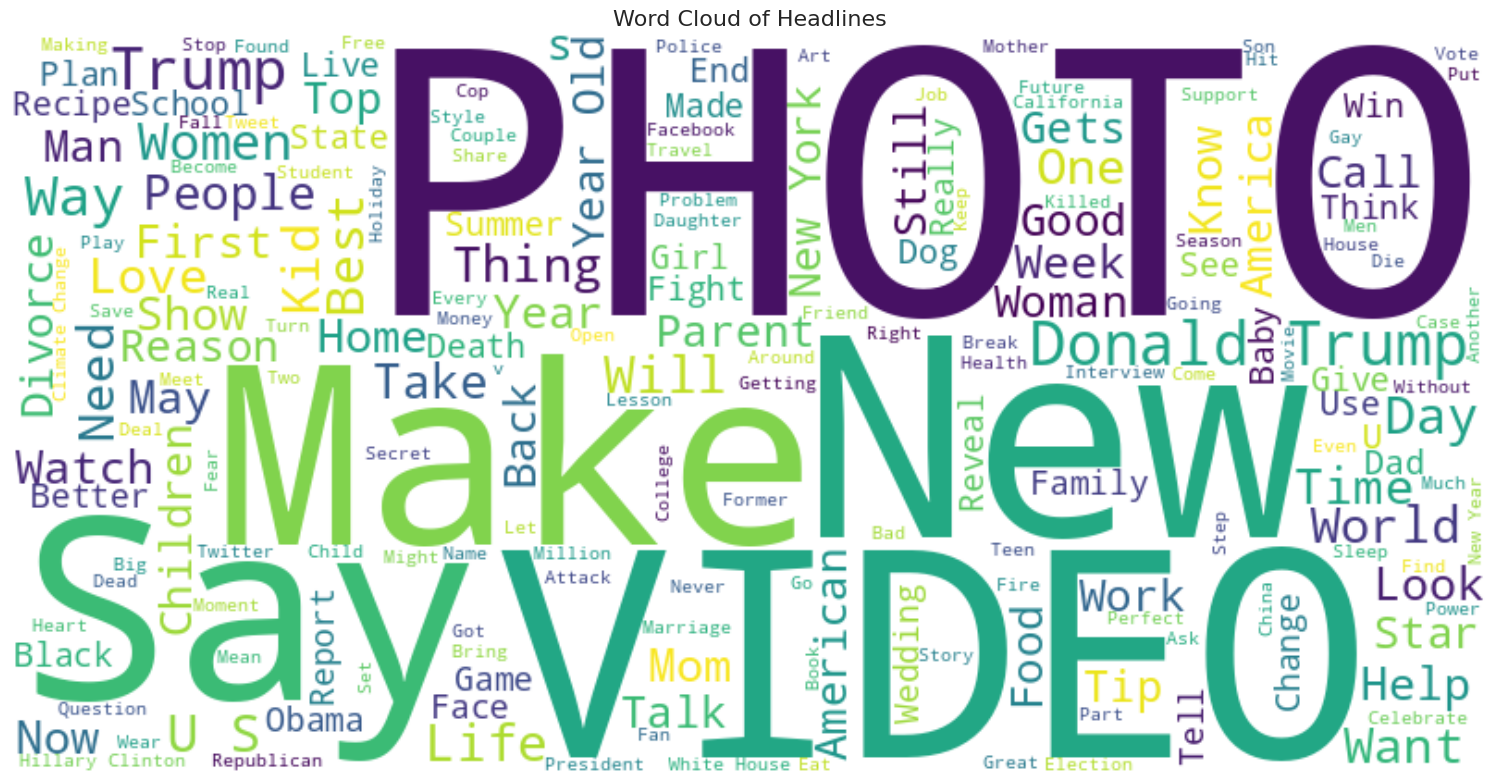

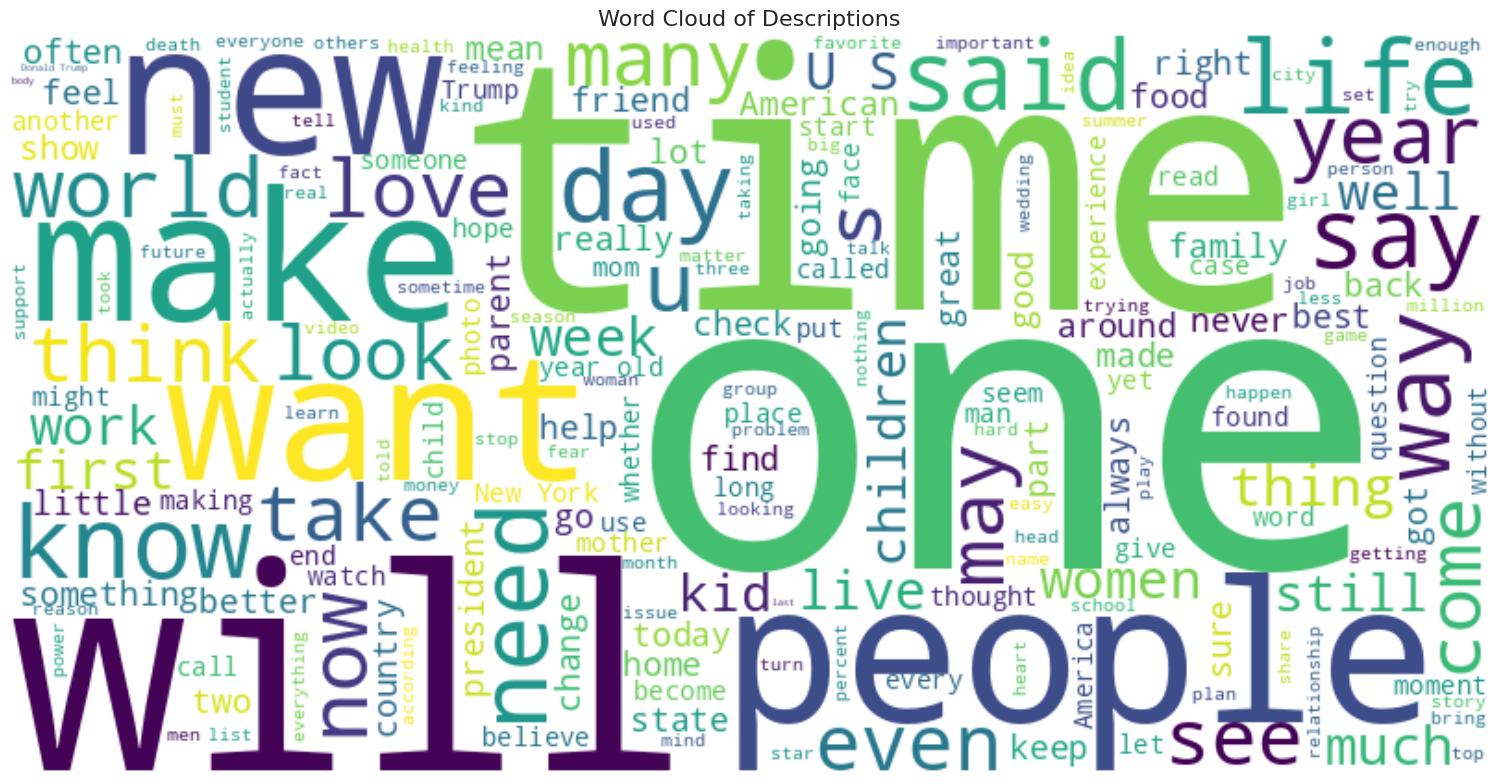

In [7]:
# Create word clouds for headlines and descriptions
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, contour_width=3, contour_color='steelblue').generate(text)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word cloud for headlines
headlines_text = ' '.join(df['headline'].astype(str))
create_wordcloud(headlines_text, 'Word Cloud of Headlines')

# Create word cloud for descriptions
descriptions_text = ' '.join(df['short_description'].astype(str))
create_wordcloud(descriptions_text, 'Word Cloud of Descriptions')

- Loại bỏ stop words (từ dừng) và kết hợp 2 cột headline và short-description xử lí trước khi đưa vào mô hình

In [10]:
# Load stopwords
with open("/kaggle/input/stopwords-en/stopwords-en.txt", encoding="utf-8") as f:
    stopwords = [x.strip() for x in f.readlines()]

# Hàm xử lý text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # bỏ dấu câu
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords]
    return tokens

# Kết hợp headline và description → xử lý
# Huấn luyện mô hình Word2Vec từ dữ liệu đã tokenized
# Tạo cột 'combined' để nối headline + short_description
df['combined'] = df['headline'].fillna('') + ' ' + df['short_description'].fillna('')

# Áp dụng clean_text để tạo cột 'tokens'
df['tokens'] = df['combined'].apply(clean_text)
print("Done!")

Done!


- Sử dụng mô hình Word2Vec để chuyển dữ liệu Text về Vector.
- Mục đích sử dụng Word2Vec: Biểu diễn dưới dạng dense vector, học được ngữ cảnh của câu hơn so với các phương pháp Embedding rời rạc.

In [11]:
# Huấn luyện mô hình Word2Vec từ dữ liệu đã tokenized
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4, sg=1)
print("Done!")

Done!


In [12]:
# Hàm chuyển một văn bản (token list) → vector trung bình
def document_vector(tokens):
    vectors = [w2v_model.wv[w] for w in tokens if w in w2v_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Áp dụng lên toàn bộ dữ liệu
X = np.array([document_vector(tokens) for tokens in df['tokens']])
y = df['category']  # nhãn
print("Done!")

Done!


In [13]:
# Chia train-test
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print("Done!")

Done!


In [15]:
print("Vector trung bình của câu 1 (tokens):")
print(df['tokens'].iloc[0])
print("\nVector biểu diễn:")
print(X[0])
print("\nKích thước vector:", X[0].shape)


Vector trung bình của câu 1 (tokens):
['4', 'americans', 'roll', 'sleeves', 'omicrontargeted', 'covid', 'boosters', 'health', 'experts', 'predict', 'demand', 'match', '171', 'doses', 'boosters', 'fall']

Vector biểu diễn:
[ 0.12900674  0.26006117 -0.08317779  0.02272758  0.13262247 -0.17582674
  0.25003082  0.24093366 -0.04366013 -0.0711349  -0.05531657 -0.14405209
 -0.0480824   0.12493703  0.0863287  -0.24127848 -0.24175185 -0.14787994
 -0.26379994 -0.42314228  0.36782172 -0.07974517  0.11274901  0.14910124
  0.07833373  0.16882321  0.02196594 -0.01986402 -0.1672689  -0.21467079
  0.14923695 -0.19063358 -0.03845654 -0.00684943  0.01479181 -0.16955538
  0.06611837 -0.35314572 -0.12187796 -0.31877297  0.10354403 -0.18943113
 -0.17215241  0.05726005  0.28361431 -0.16528895 -0.05192957  0.04482798
  0.1607011   0.49619535  0.03758476 -0.04826484  0.18717247  0.0278578
 -0.31329733  0.09892777  0.12027014 -0.0307459   0.12327912 -0.08194427
 -0.16519219 -0.05399151 -0.11578432  0.12889346 

In [16]:
print("\nSố lượng mẫu train:", len(X_train))
print("Số lượng mẫu test:", len(X_test))



Số lượng mẫu train: 153384
Số lượng mẫu test: 38347


### Bước 2: Xây dựng mô hình SVM

In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import time

# Chỉ dùng 30,000 mẫu đầu tiên
X_sample = X_train[:30000]
y_sample = y_train[:30000]

# Tạo pipeline: Chuẩn hóa + LinearSVC
model = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=10000)
)

# Đo thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình
model.fit(X_sample, y_sample)

# Đo thời gian kết thúc
end_time = time.time()

# In thời gian huấn luyện
print("✅ Done training LinearSVC on 30,000 samples!")
print(f"⏱️ Thời gian huấn luyện: {end_time - start_time:.2f} giây")


### Bước 3: Dự đoán và đánh giá thực tế

In [ ]:
y_pred = svm_clf.predict(X_test)
print("🎯 Classification Report:")
print(classification_report(y_test, y_pred))

## 4. Cập nhật kết quả cuối kỳ (W37)

### Chi tiết phương pháp, dữ liệu 
....

### Chương trình
...

### Phân tích, đánh giá kết quả
...

### Cập nhật phân công, khối lượng công việc
<!-- công việc của các thành viên, tỷ lệ đóng góp của các thành viên -->
...